<h1> MV_Adam_With_Mini_Batch </h1>

In [ ]:
######### 3aiz azabt el plots  ################

### Librarires 

In [1]:
import numpy as np
import random
import math as ma
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Functions

In [2]:
def Loss_Epochs_plot(X, Y, xlabel, ylabel):
    fig = plt.figure()
    plt.plot(X, Y, marker = 'o')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def regression_lines_plot(X, Y, xlabel, ylabel):
    plt.plot(X, Y, 'r')
    plt.grid(linewidth = 0.3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Vs. {xlabel}")
    
def training_report(a , b, c, d, e):
    print("\n****************** Training Report ********************\n")
    print(f"Adam_Mini_Batch_MV converged after {int(a)} epochs")
    print(f"\nThetas_Opt :\n {b} ")
    print("\nCost = ", c)
    print("\nh(x) = y_predict:\n", d)
    print("\ny_actual:\n", e)
    
def all_plots(m, X, Y, Y_pred):
#     theta_0 = m[:, 1]
#     theta_1 = m[:, 2]

    cost = m[:, 3]                  # Draw between iterations and cost
    x = np.arange(len(m[:, 1]))
    fig = plt.figure()
    Loss_Epochs_plot(x, cost, 'iterations', 'Loss')

#     Loss_Epochs_plot(theta_0, cost, 'theta_0', "Loss")
#     plt.title("Learning Rate = 0.0005")
#     Loss_Epochs_plot(theta_1, cost, "theta_1", "Loss")
#     plt.title("Learning Rate = 0.0005")

#     fig = plt.figure()
#     plt.plot(X, Y, 'ob')
#     for i in Y_pred:
#         regression_lines_plot(X, i, "x", "y")
    
#     fig = plt.figure()
#     plt.plot(X, Y, 'ob', markersize = 4)
#     regression_lines_plot(X, Y_pred[-1], "x", "y")


### Read Data

In [3]:
data = np.genfromtxt('MultiVarLR.csv', delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [4]:
# shuffling data:

data = list(data)

np.array(random.shuffle(data))
shuff_data = np.array(data)
shuff_data

array([[ 53.,  46.,  55., 101.],
       [ 87.,  79.,  90., 175.],
       [ 73.,  80.,  75., 152.],
       [ 82.,  86.,  90., 177.],
       [ 93.,  88.,  93., 185.],
       [ 78.,  83.,  77., 159.],
       [ 79.,  70.,  88., 164.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 96.,  98., 100., 196.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 88.,  92.,  86., 177.],
       [ 86.,  82.,  89., 175.],
       [ 70.,  73.,  78., 148.],
       [ 89.,  91.,  90., 180.],
       [ 79.,  80.,  73., 152.],
       [ 78.,  83.,  85., 175.],
       [ 81.,  90.,  93., 183.],
       [ 69.,  74.,  77., 149.],
       [ 96.,  93.,  95., 192.],
       [ 69.,  70.,  73., 141.],
       [ 76.,  83.,  71., 149.],
       [ 47.,  56.,  60., 115.],
       [ 73.,  66.,  70., 142.]])

In [5]:
X = shuff_data[:, :3].reshape(shuff_data.shape[0], shuff_data.shape[1] - 1)
y = shuff_data[:, 3].reshape(shuff_data.shape[0], 1)
X

array([[ 53.,  46.,  55.],
       [ 87.,  79.,  90.],
       [ 73.,  80.,  75.],
       [ 82.,  86.,  90.],
       [ 93.,  88.,  93.],
       [ 78.,  83.,  77.],
       [ 79.,  70.,  88.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 96.,  98., 100.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 88.,  92.,  86.],
       [ 86.,  82.,  89.],
       [ 70.,  73.,  78.],
       [ 89.,  91.,  90.],
       [ 79.,  80.,  73.],
       [ 78.,  83.,  85.],
       [ 81.,  90.,  93.],
       [ 69.,  74.,  77.],
       [ 96.,  93.,  95.],
       [ 69.,  70.,  73.],
       [ 76.,  83.,  71.],
       [ 47.,  56.,  60.],
       [ 73.,  66.,  70.]])

## Implementation of Adam_with_Mini_Batch

In [6]:
def Adam_Mini_Batch_MV(X, Y, BETA1, BETA2, LR, EPSILON, BATCH, MAX_ITER):
    
# Step_1: Iniz=tialization
    X0 = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    X = np.concatenate((X0, X), axis = 1)
    Thetas = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
    m = X.shape[0]
    
    m_t = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
    v_t = np.zeros(X.shape[1]).reshape(X.shape[1], 1)
    
    Y_pred = []
    Thetas_and_Cost = []
    epoch_cost = []
    
# slice Data Based on Batch Size
    X_batchs = [X[BATCH*k:BATCH*(k+1)] for k in range(m//BATCH + 1)]
    Y_batchs = [Y[BATCH*k:BATCH*(k+1)] for k in range(m//BATCH + 1)]

    if len(X_batchs[-1]) == 0:
        del(X_batchs[-1])
        del(Y_batchs[-1])
        
# Repeating untill Max_iter or condition will be True:
    for i in range(MAX_ITER):
        print(f"\n****************** Ephoc {i} ********************")
        for j in range(ma.ceil(m/BATCH)):
        # step_2: Calc Hypothes (y_prediction):
            y_pred = X_batchs[j] @ Thetas
            Y_pred.append(y_pred)
            
        # step_3
            Error = y_pred - Y_batchs[j]
            cost = (1/(2*BATCH)) * (Error.T @ Error)
        
            Thetas_and_Cost.append([i, j, Thetas, cost])         # append values of thetas, each iteration in each epoch cost
            
        # step_4
            d_Thetas = ((1/BATCH) * sum(X_batchs[j] * Error)).reshape(X.shape[1], 1)
        
        # step_5
            m_t = (BETA1 * m_t) + ((1 - BETA1)*(d_Thetas))
            v_t = (BETA2 * v_t) + ((1 - BETA2)*(d_Thetas)**2)
        
            m_t_hat = m_t / (1-((BETA1)**(j+1)))                          
            v_t_hat = v_t / (1-((BETA2)**(j+1)))

        
            Thetas = Thetas - ((LR/(np.sqrt(v_t_hat) + EPSILON)) * m_t_hat)
            
        print("\nCost = ", cost)
        epoch_cost.append(cost)
        
        GV_norm = np.linalg.norm(d_Thetas)
        print("\nGradient Vector:\n", d_Thetas)
        print("\nGradient Vector Norm:\n", GV_norm)
        
        if (GV_norm < 0.01) or ((i>0) and (abs(epoch_cost[i] - epoch_cost[i-1]) < 0.01)):   # (Gradient Check, convergence check)
            break
        
        print("\nThetas_new : \n", Thetas)
        
    return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)

#### Test Implementation

###### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, batch = 5, and max. iterations = 500.

In [7]:
theta_cost_vec, y_pred, Epoch_Cost, Thetas_opt, y_batchs = Adam_Mini_Batch_MV(X, y, 0.2, 0.7, 0.05, 1e-08, 5, 500)
training_report((theta_cost_vec[-1][0] + 1), Thetas_opt, Epoch_Cost[-1], y_pred[-5:], y_batchs)


****************** Ephoc 0 ********************

Cost =  [[5628.60446871]]

Gradient Vector:
 [[ -104.66295778]
 [-7818.83579728]
 [-7910.24153412]
 [-7922.29091745]]

Gradient Vector Norm:
 13655.759300321362

Thetas_new : 
 [[0.23715553]
 [0.2350552 ]
 [0.23706491]
 [0.2347679 ]]

****************** Ephoc 1 ********************

Cost =  [[2154.14942542]]

Gradient Vector:
 [[  -64.78304189]
 [-4830.52331505]
 [-4886.45156462]
 [-4900.93349081]]

Gradient Vector Norm:
 8440.06577666758

Thetas_new : 
 [[0.41169738]
 [0.40852252]
 [0.41094423]
 [0.408209  ]]

****************** Ephoc 2 ********************

Cost =  [[500.27131537]]

Gradient Vector:
 [[  -31.19208832]
 [-2313.46059483]
 [-2339.50921821]
 [-2356.03493208]]

Gradient Vector Norm:
 4046.884833234017

Thetas_new : 
 [[0.55801801]
 [0.55417281]
 [0.55678901]
 [0.55398479]]

****************** Ephoc 3 ********************

Cost =  [[26.79922469]]

Gradient Vector:
 [[  -6.52203578]
 [-464.87321394]
 [-468.97961133]
 [-486.9

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18464\2324645241.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)


In [235]:
# for i in range(len(X) + 1):
#     for j in range(theta_cost_vec[-1][0]):
#         print(theta_cost_vec[:, [2]][j][0][i])

In [8]:
lst = []
for i in y_pred[-5:]:
    for j in i:
        lst.append(list(j))
y_predection = np.array(lst).reshape(25)
print(f"y_prediction:\n{np.array(lst).reshape(25)}")

print("\n")

lst1 = []
for i in y_batchs:
    for j in i:
        lst1.append(list(j))
y_actual = np.array(lst1).reshape(25)
print(f"y_actual:\n {np.array(lst1).reshape(25)}")

y_prediction:
[104.78600535 172.9942005  150.98514531 173.14078312 183.51439762
 159.99116616 164.93274752 143.83866303 188.04991405 199.79048563
 182.6930523  141.98379686 171.88351796 169.05458615 145.54551108
 187.64221676 159.62471074 171.97498936 184.95735878 154.21161133
 190.74267931 143.10791692 151.46309285 111.07870935 140.91094182]


y_actual:
 [101. 175. 152. 177. 185. 159. 164. 141. 184. 196. 192. 147. 177. 175.
 148. 180. 152. 175. 183. 149. 192. 141. 149. 115. 142.]


In [9]:
score = r2_score(y_actual,y_predection)
print("r2_score: ", score)

r2_score:  0.9681558650759088


<Figure size 640x480 with 0 Axes>

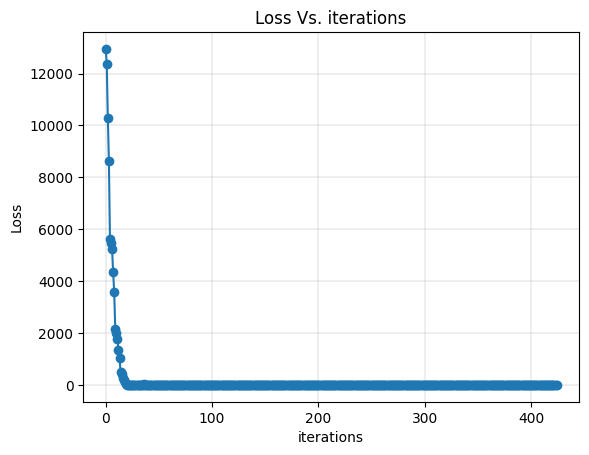

In [10]:
all_plots(theta_cost_vec, X, y, y_predection)

###### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, batch = 5, and max. iterations = 500.

In [11]:
theta_cost_vec, y_pred, Epoch_Cost, Thetas_opt, y_batchs = Adam_Mini_Batch_MV(X, y, 0.5, 0.8, 0.005, 1e-08, 5, 500)
training_report((theta_cost_vec[-1][0] + 1), Thetas_opt, Epoch_Cost[-1], y_pred[-5:], y_batchs)


****************** Ephoc 0 ********************

Cost =  [[10569.00673499]]

Gradient Vector:
 [[  -143.36683303]
 [-10719.01068083]
 [-10844.86655193]
 [-10854.53724863]]

Gradient Vector Norm:
 18717.634824827976

Thetas_new : 
 [[0.02491504]
 [0.02480036]
 [0.02491209]
 [0.02478447]]

****************** Ephoc 1 ********************

Cost =  [[9835.26228211]]

Gradient Vector:
 [[  -138.30638183]
 [-10339.81664264]
 [-10461.17123494]
 [-10471.15003673]]

Gradient Vector Norm:
 18055.803043820535

Thetas_new : 
 [[0.04742672]
 [0.047204  ]
 [0.04734073]
 [0.04717829]]

****************** Ephoc 2 ********************

Cost =  [[9182.83441203]]

Gradient Vector:
 [[  -133.64561426]
 [ -9990.57183782]
 [-10107.78100505]
 [-10118.04319179]]

Gradient Vector Norm:
 17446.24376975485

Thetas_new : 
 [[0.06846039]
 [0.06815792]
 [0.06830139]
 [0.06812517]]

****************** Ephoc 3 ********************

Cost =  [[8569.9326201]]

Gradient Vector:
 [[ -129.11374204]
 [-9650.98547113]
 [-976


****************** Training Report ********************

Adam_Mini_Batch_MV converged after 210 epochs

Thetas_Opt :
 [[0.50239662]
 [0.55790666]
 [0.5774407 ]
 [0.88332746]] 

Cost =  [[3.76923017]]

h(x) = y_predict:
 [[[105.21406237]
  [174.15381771]
  [153.67630871]
  [175.40605295]
  [185.35170401]]

 [[159.84030628]
  [162.59744871]
  [142.34180161]
  [187.48299603]
  [198.82710845]]

 [[187.64780413]
  [146.65878812]
  [177.80226609]
  [173.58701217]
  [149.86627128]]

 [[181.28766888]
  [154.47127071]
  [166.19352196]
  [178.91373049]
  [148.99613099]]

 [[191.53653596]
  [143.79389129]
  [153.43352361]
  [111.97553069]
  [141.06826609]]]

y_actual:
 [[[101.]
  [175.]
  [152.]
  [177.]
  [185.]]

 [[159.]
  [164.]
  [141.]
  [184.]
  [196.]]

 [[192.]
  [147.]
  [177.]
  [175.]
  [148.]]

 [[180.]
  [152.]
  [175.]
  [183.]
  [149.]]

 [[192.]
  [141.]
  [149.]
  [115.]
  [142.]]]


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18464\2324645241.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)


In [12]:
lst = []
for i in y_pred[-5:]:
    for j in i:
        lst.append(list(j))
y_predection = np.array(lst).reshape(25)
print(f"y_prediction:\n{np.array(lst).reshape(25)}")

print("\n")

lst1 = []
for i in y_batchs:
    for j in i:
        lst1.append(list(j))
y_actual = np.array(lst1).reshape(25)
print(f"y_actual:\n {np.array(lst1).reshape(25)}")

y_prediction:
[105.21406237 174.15381771 153.67630871 175.40605295 185.35170401
 159.84030628 162.59744871 142.34180161 187.48299603 198.82710845
 187.64780413 146.65878812 177.80226609 173.58701217 149.86627128
 181.28766888 154.47127071 166.19352196 178.91373049 148.99613099
 191.53653596 143.79389129 153.43352361 111.97553069 141.06826609]


y_actual:
 [101. 175. 152. 177. 185. 159. 164. 141. 184. 196. 192. 147. 177. 175.
 148. 180. 152. 175. 183. 149. 192. 141. 149. 115. 142.]


In [13]:
score = r2_score(y_actual,y_predection)
print("r2_score: ", score)

r2_score:  0.9846171355532951


<Figure size 640x480 with 0 Axes>

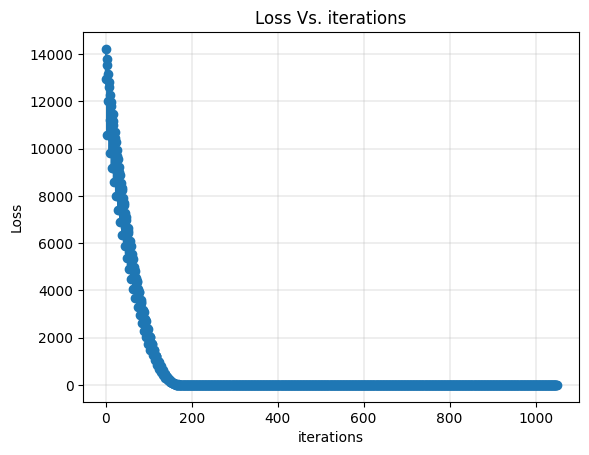

In [14]:
all_plots(theta_cost_vec, X, y, y_predection)

###### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, batch = 10, and max. iterations = 500.

In [15]:
theta_cost_vec, y_pred, Epoch_Cost, Thetas_opt, y_batchs = Adam_Mini_Batch_MV(X, y, 0.5, 0.8, 0.005, 1e-08, 10, 500)
training_report((theta_cost_vec[-1][0] + 1), Thetas_opt, Epoch_Cost[-1], y_pred[-3:], y_batchs)


****************** Ephoc 0 ********************

Cost =  [[5449.95819533]]

Gradient Vector:
 [[  -72.79570108]
 [-5442.85175303]
 [-5506.76943679]
 [-5511.53670051]]

Gradient Vector Norm:
 9504.287498315958

Thetas_new : 
 [[0.01417291]
 [0.014072  ]
 [0.01410578]
 [0.01404889]]

****************** Ephoc 1 ********************

Cost =  [[5221.03840114]]

Gradient Vector:
 [[  -71.25215794]
 [-5327.18935239]
 [-5389.73405676]
 [-5394.59552142]]

Gradient Vector Norm:
 9302.414595604923

Thetas_new : 
 [[0.0279371 ]
 [0.02770547]
 [0.02775507]
 [0.02765361]]

****************** Ephoc 2 ********************

Cost =  [[5014.78881332]]

Gradient Vector:
 [[  -69.83221098]
 [-5220.78836672]
 [-5282.07008801]
 [-5287.01813914]]

Gradient Vector Norm:
 9116.70625422968

Thetas_new : 
 [[0.04068128]
 [0.04033211]
 [0.04038995]
 [0.04025466]]

****************** Ephoc 3 ********************

Cost =  [[4823.08398095]]

Gradient Vector:
 [[  -68.48595673]
 [-5119.90939668]
 [-5179.99370906]
 [-

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18464\2324645241.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)


In [16]:
lst = []
for i in y_pred[-3:]:
    for j in i:
        lst.append(list(j))
y_predection = np.array(lst).reshape(25)
print(f"y_prediction:\n{y_predection}")

print("\n")

lst1 = []
for i in y_batchs:
    for j in i:
        lst1.append(list(j))
y_actual = np.array(lst1).reshape(25)
print(f"y_actual:\n {y_actual}")

y_prediction:
[104.31278164 172.95211888 154.1060279  174.29708688 185.06285198
 160.83456463 160.16920307 141.32416709 188.42494706 198.52134501
 187.58991997 149.25879467 179.51590324 173.47097368 149.26746755
 182.20780094 156.65535684 166.07437691 178.1778618  148.59438403
 191.80906429 143.35593557 155.4596816  110.38297026 141.33501282]


y_actual:
 [101. 175. 152. 177. 185. 159. 164. 141. 184. 196. 192. 147. 177. 175.
 148. 180. 152. 175. 183. 149. 192. 141. 149. 115. 142.]


In [17]:
score = r2_score(y_actual,y_predection)
print("r2_score: ", score)

r2_score:  0.9780521076781338


<Figure size 640x480 with 0 Axes>

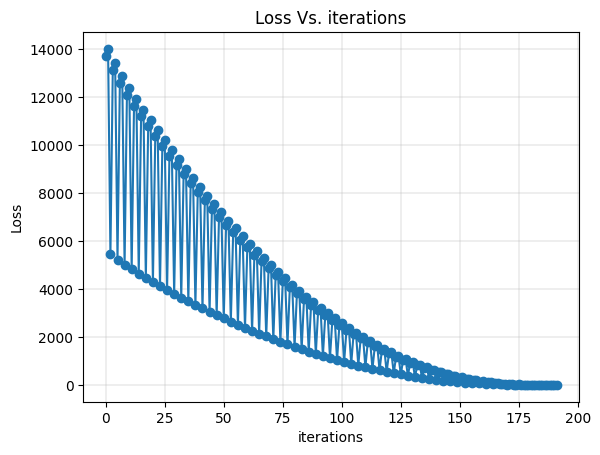

In [18]:
all_plots(theta_cost_vec, X, y, y_predection)

###### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, batch = 5, and max. iterations = 500.

In [19]:
theta_cost_vec, y_pred, Epoch_Cost, Thetas_opt, y_batchs = Adam_Mini_Batch_MV(X, y, 0.8, 0.8, 0.0005, 1e-08, 5, 500)
training_report((theta_cost_vec[-1][0] + 1), Thetas_opt, Epoch_Cost[-1], y_pred[-3:], y_batchs)


****************** Ephoc 0 ********************

Cost =  [[11166.51826281]]

Gradient Vector:
 [[  -147.3591867 ]
 [-11018.16858647]
 [-11147.57653525]
 [-11157.00329875]]

Gradient Vector Norm:
 19239.774919354455

Thetas_new : 
 [[0.00249863]
 [0.00249582]
 [0.00249544]
 [0.00249583]]

****************** Ephoc 1 ********************

Cost =  [[11051.43551375]]

Gradient Vector:
 [[  -146.59871588]
 [-10961.18427881]
 [-11089.91587362]
 [-11099.38884316]]

Gradient Vector Norm:
 19140.316579231065

Thetas_new : 
 [[0.00603036]
 [0.00601927]
 [0.00601855]
 [0.0060182 ]]

****************** Ephoc 2 ********************

Cost =  [[10926.36546481]]

Gradient Vector:
 [[  -145.76774228]
 [-10898.91698609]
 [-11026.90952183]
 [-11036.43298542]]

Gradient Vector Norm:
 19031.63751096196

Thetas_new : 
 [[0.00982991]
 [0.00980938]
 [0.00980834]
 [0.00980698]]

****************** Ephoc 3 ********************

Cost =  [[10798.76837739]]

Gradient Vector:
 [[  -144.91506015]
 [-10835.02300858]



Gradient Vector:
 [[  -23.2603389 ]
 [-1719.07555987]
 [-1738.11243237]
 [-1755.07964957]]

Gradient Vector Norm:
 3009.5018238585308

Thetas_new : 
 [[0.56669779]
 [0.56526373]
 [0.56515178]
 [0.56503055]]

****************** Ephoc 145 ********************

Cost =  [[259.49091891]]

Gradient Vector:
 [[  -22.39857233]
 [-1654.50080448]
 [-1672.77126933]
 [-1689.79083153]]

Gradient Vector Norm:
 2896.7967450103824

Thetas_new : 
 [[0.57061585]
 [0.56917167]
 [0.56905721]
 [0.56893618]]

****************** Ephoc 146 ********************

Cost =  [[240.18928933]]

Gradient Vector:
 [[  -21.53689248]
 [-1589.93254442]
 [-1607.43668071]
 [-1624.50858144]]

Gradient Vector Norm:
 2784.103113605934

Thetas_new : 
 [[0.57453359]
 [0.57307926]
 [0.57296218]
 [0.57284143]]

****************** Ephoc 147 ********************

Cost =  [[221.65545947]]

Gradient Vector:
 [[  -20.67530883]
 [-1525.37149043]
 [-1542.10938587]
 [-1559.23361798]]

Gradient Vector Norm:
 2671.422184090892

Thetas_new 

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18464\2324645241.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)


In [20]:
lst = []
for i in y_pred[-5:]:
    for j in i:
        lst.append(list(j))
y_predection = np.array(lst).reshape(25)
print(f"y_prediction:\n{y_predection}")

print("\n")

lst1 = []
for i in y_batchs:
    for j in i:
        lst1.append(list(j))
y_actual = np.array(lst1).reshape(25)
print(f"y_actual:\n {y_actual}")

y_prediction:
[104.22403348 172.80388167 153.95743235 174.14283401 184.89576244
 160.69896937 160.0667062  141.22317718 188.26983914 198.36867541
 187.57527227 149.22624828 179.48587582 173.45772541 149.25736643
 182.16088088 156.60362686 166.03792378 178.14270409 148.56357848
 191.61513618 143.21372241 155.28552755 110.2791255  141.19226692]


y_actual:
 [101. 175. 152. 177. 185. 159. 164. 141. 184. 196. 192. 147. 177. 175.
 148. 180. 152. 175. 183. 149. 192. 141. 149. 115. 142.]


In [21]:
score = r2_score(y_actual,y_predection)
print("r2_score: ", score)

r2_score:  0.9782624988014681


<Figure size 640x480 with 0 Axes>

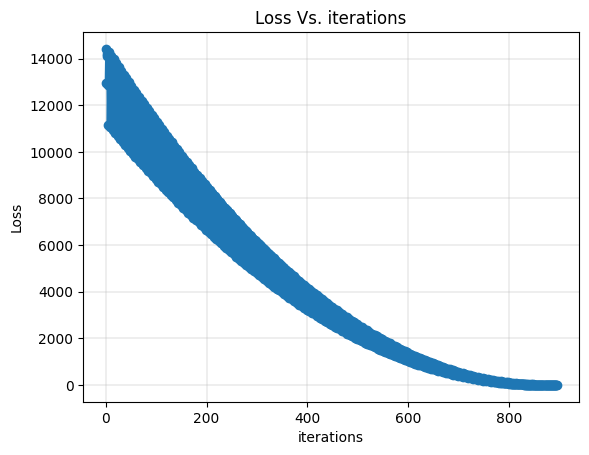

In [22]:
all_plots(theta_cost_vec, X, y, y_predection)

###### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, batch = 10, and max. iterations = 500.

In [23]:
theta_cost_vec, y_pred, Epoch_Cost, Thetas_opt, y_batchs = Adam_Mini_Batch_MV(X, y, 0.8, 0.8, 0.0005, 1e-08, 10, 500)
training_report((theta_cost_vec[-1][0] + 1), Thetas_opt, Epoch_Cost[-1], y_pred[-3:], y_batchs)


****************** Ephoc 0 ********************

Cost =  [[5599.9785264]]

Gradient Vector:
 [[  -73.78970777]
 [-5517.33548119]
 [-5582.13738947]
 [-5586.84408752]]

Gradient Vector Norm:
 9634.288786732028

Thetas_new : 
 [[0.00147138]
 [0.0014664 ]
 [0.00146641]
 [0.0014653 ]]

****************** Ephoc 1 ********************

Cost =  [[5567.4048133]]

Gradient Vector:
 [[  -73.57502411]
 [-5501.24858283]
 [-5565.85954447]
 [-5570.57931867]]

Gradient Vector Norm:
 9606.211306682428

Thetas_new : 
 [[0.00354034]
 [0.00352051]
 [0.00352139]
 [0.00351616]]

****************** Ephoc 2 ********************

Cost =  [[5529.94391472]]

Gradient Vector:
 [[  -73.3273521 ]
 [-5482.68976342]
 [-5547.08043703]
 [-5551.81530089]]

Gradient Vector Norm:
 9573.819428661272

Thetas_new : 
 [[0.00585262]
 [0.00581456]
 [0.00581644]
 [0.0058062 ]]

****************** Ephoc 3 ********************

Cost =  [[5490.32174176]]

Gradient Vector:
 [[  -73.06447572]
 [-5462.99163237]
 [-5527.14849457]
 [-5


Gradient Vector:
 [[  -1.55114826]
 [-104.28064682]
 [-104.83214304]
 [-113.93817576]]

Gradient Vector Norm:
 186.6776512358185

Thetas_new : 
 [[0.66276038]
 [0.65685028]
 [0.65698814]
 [0.65576198]]

****************** Ephoc 262 ********************

Cost =  [[4.64290691]]

Gradient Vector:
 [[ -1.28613362]
 [-84.42240116]
 [-84.73825504]
 [-93.86026495]]

Gradient Vector Norm:
 152.04971936632117

Thetas_new : 
 [[0.66519747]
 [0.65924745]
 [0.65937662]
 [0.65816393]]

****************** Ephoc 263 ********************

Cost =  [[4.08544528]]

Gradient Vector:
 [[ -1.02393697]
 [-64.77534543]
 [-64.8580767 ]
 [-73.99585371]]

Gradient Vector Norm:
 117.80853238198625

Thetas_new : 
 [[0.66760913]
 [0.66161644]
 [0.66173501]
 [0.66054029]]

****************** Ephoc 264 ********************

Cost =  [[3.67501895]]

Gradient Vector:
 [[ -0.76572893]
 [-45.42721685]
 [-45.2803911 ]
 [-54.43363573]]

Gradient Vector Norm:
 84.12819317774728

Thetas_new : 
 [[0.66998393]
 [0.66394503]
 [

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18464\2324645241.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(Thetas_and_Cost), np.array(Y_pred), np.array(epoch_cost), Thetas, np.array(Y_batchs)


In [24]:
lst = []
for i in y_pred[-3:]:
    for j in i:
        lst.append(list(j))
y_predection = np.array(lst).reshape(25)
print(f"y_prediction:\n{y_predection}")

print("\n")

lst1 = []
for i in y_batchs:
    for j in i:
        lst1.append(list(j))
y_actual = np.array(lst1).reshape(25)
print(f"y_actual:\n {y_actual}")

y_prediction:
[104.43241066 173.15156316 154.28825831 174.49863171 185.27918148
 161.02590229 160.34977519 141.48670507 188.64844416 198.75315865
 187.9533623  149.55635564 179.86973571 173.80682106 149.55514861
 182.56418335 156.96611865 166.39628212 178.52149954 148.88145744
 192.01384704 143.50667624 155.63265533 110.49468326 141.48586121]


y_actual:
 [101. 175. 152. 177. 185. 159. 164. 141. 184. 196. 192. 147. 177. 175.
 148. 180. 152. 175. 183. 149. 192. 141. 149. 115. 142.]


In [25]:
score = r2_score(y_actual,y_predection)
print("r2_score: ", score)

r2_score:  0.9780337837601556


<Figure size 640x480 with 0 Axes>

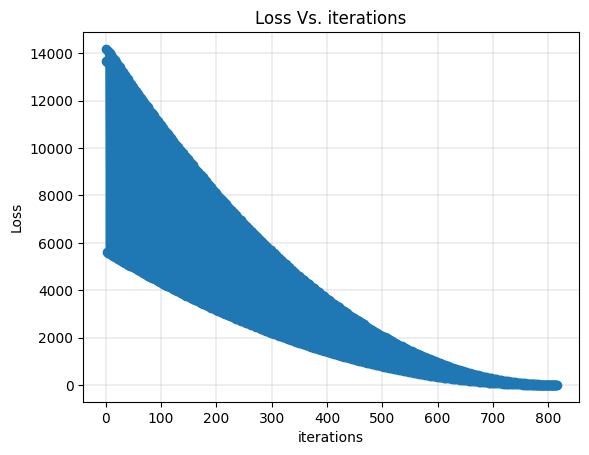

In [26]:
all_plots(theta_cost_vec, X, y, y_predection)